# **OSMnx Test**
##### In this program we test OSMnx python package instructions.

In [ ]:
# if using colab, install dependencies by un-commenting the line below
#!uv pip install --system --quiet osmnx[all]

# or this command
#!pip install osmnx

In [1]:
import networkx as nx
import osmnx as ox

ox.__version__

'2.0.5'

### Working with street networks

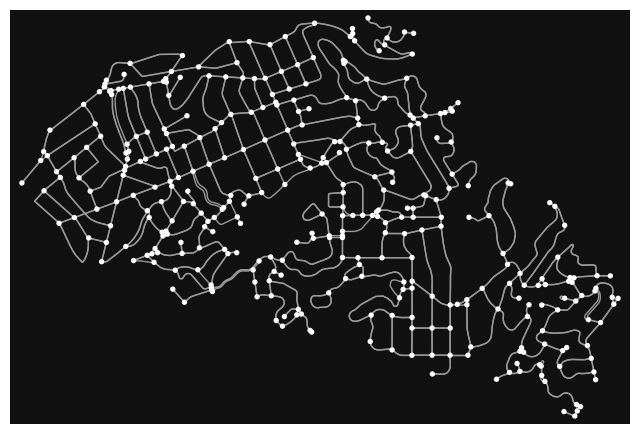

In [ ]:
# <1>
import osmnx as ox

# download/model a street network for some city then visualize it
G = ox.graph.graph_from_place("Piedmont, California, USA", network_type="drive")
fig, ax = ox.plot.plot_graph(G)

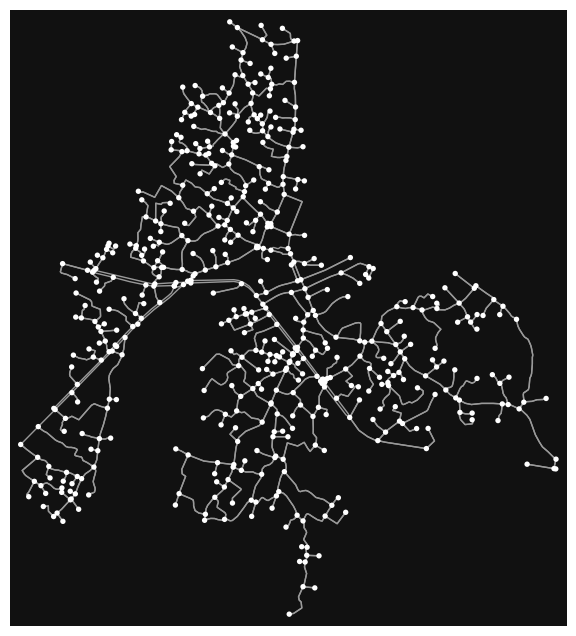

In [ ]:
# <1>
import osmnx as ox

# download/model a street network for some city then visualize it
G = ox.graph.graph_from_place("لشت نشاء، گیلان، ایران", network_type="drive")
fig, ax = ox.plot.plot_graph(G)

In [ ]:
# <2>
import osmnx as ox
G = ox.graph.graph_from_place("Piedmont, California, USA", network_type="drive")

# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.convert.graph_to_gdfs(G)
gdf_nodes.head()

# continues...

,y,x,street_count,highway,junction,geometry
osmid,,,,,,
53017091,37.826250,-122.247604,3,NaN,NaN,POINT (-122.2476 37.82625)
53018397,37.824220,-122.247198,3,stop,NaN,POINT (-122.2472 37.82422)
53018399,37.824900,-122.246113,3,NaN,NaN,POINT (-122.24611 37.8249)
53018402,37.825406,-122.245338,3,NaN,NaN,POINT (-122.24534 37.82541)
53018404,37.825948,-122.244467,3,NaN,NaN,POINT (-122.24447 37.82595)


In [ ]:
# <2>   ...continue
gdf_edges.head()

osmid      highway          name  oneway reversed  \
u        v        key                                                          
53017091 53064327 0      6345781  residential   Rose Avenue   False    False   
         53075599 0      6345781  residential   Rose Avenue   False     True   
53018397 53018399 0      6327298  residential   Lake Avenue   False    False   
         53018411 0    196739937     tertiary  Linda Avenue   False    False   
         53097980 0    196739937     tertiary  Linda Avenue   False     True   

                           length  \
u        v        key               
53017091 53064327 0    230.124412   
         53075599 0    122.234915   
53018397 53018399 0    121.647438   
         53018411 0     37.593760   
         53097980 0    100.205124   

                                                                geometry  \
u        v        key                                                      
53017091 53064327 0    LINESTRING (-122.2476 37.82625, -122.2475 37.8...   
         53075599 0    LINESTRING (-122.2476 37.82625, -122.24771 37....   
53018397 53018399 0    LINESTRING (-122.2472 37.82422, -122.24712 37....   
         53018411 0    LINESTRING (-122.2472 37.82422, -122.24713 37....   
         53097980 0    LINESTRING (-122.2472 37.82422, -122.24772 37....   

                      lanes maxspeed bridge junction  
u        v        key                                 
53017091 53064327 0     NaN      NaN    NaN      NaN  
         53075599 0     NaN      NaN    NaN      NaN  
53018397 53018399 0     NaN      NaN    NaN      NaN  
         53018411 0     NaN      NaN    NaN      NaN  
         53097980 0     NaN      NaN    NaN      NaN

In [1]:
# <3>
import osmnx as ox
G = ox.graph.graph_from_place("Piedmont, California, USA", network_type="drive")

# save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.io.save_graph_geopackage(G, filepath="../data/mynetwork.gpkg")
ox.io.save_graphml(G, filepath="../data/mynetwork.graphml")

### Working with features module

In [4]:
# <4>
import osmnx as ox

# get all building footprints in some neighborhood
place = "Chinatown, San Francisco, California"
tags = {"building": True}
gdf = ox.features.features_from_place(place, tags)
gdf.shape

# continues...

(566, 104)

In [6]:
# <4>   ...continue
gdf.head()
# continues...

geometry  \
element  id                                                           
relation 3491475  POLYGON ((-122.406 37.7912, -122.40603 37.7913...   
         3491829  POLYGON ((-122.40632 37.79152, -122.40634 37.7...   
         3497110  POLYGON ((-122.40876 37.79389, -122.40872 37.7...   
         3497168  POLYGON ((-122.40571 37.79366, -122.40572 37.7...   
         3503059  POLYGON ((-122.40761 37.79539, -122.4076 37.79...   

                      addr:city                     addr:housenumber  \
element  id                                                            
relation 3491475            NaN              455;457;459;461;463;465   
         3491829            NaN                                  626   
         3497110            NaN                                  965   
         3497168            NaN  746;748;750;752;754;756;758;760;762   
         3503059  San Francisco                                  858   

                 addr:postcode addr:state        addr:street building height  \
element  id                                                                    
relation 3491475           NaN        NaN       Grant Avenue      yes    NaN   
         3491829           NaN        NaN        Pine Street      yes     15   
         3497110           NaN        NaN        Clay Street      yes    NaN   
         3497168           NaN        NaN  Sacramento Street      yes    NaN   
         3503059           NaN        NaN  Washington Street      yes    NaN   

                 source check_date  ...        old_name office short_name  \
element  id                         ...                                     
relation 3491475    NaN        NaN  ...             NaN    NaN        NaN   
         3491829    NaN        NaN  ...             NaN    NaN        NaN   
         3497110    NaN        NaN  ...  YWCA Chinatown    NaN        NaN   
         3497168    NaN        NaN  ...             NaN    NaN        NaN   
         3503059    NaN        NaN  ...             NaN    NaN        NaN   

                 baby_hatch operator:wikidata operator:wikipedia layer  \
element  id                                                              
relation 3491475        NaN               NaN                NaN   NaN   
         3491829        NaN               NaN                NaN   NaN   
         3497110        NaN               NaN                NaN   NaN   
         3497168        NaN               NaN                NaN   NaN   
         3503059        NaN               NaN                NaN   NaN   

                 building:levels:underground roof:levels          type  
element  id                                                             
relation 3491475                         NaN         NaN  multipolygon  
         3491829                         NaN         NaN  multipolygon  
         3497110                         NaN         NaN  multipolygon  
         3497168                         NaN         NaN  multipolygon  
         3503059                         NaN         NaN  multipolygon  

[5 rows x 104 columns]

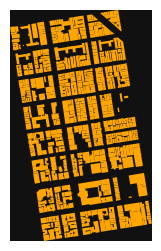

In [7]:
# <4>   ...continue
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))

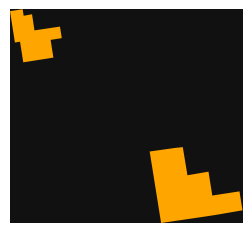

In [12]:
# <4>
import osmnx as ox

# get all parks and bus stops in some neighborhood
place = "Chinatown, San Francisco, California"
tags = {"leisure": "park", "highway": "bus_stop"}
gdf = ox.features.features_from_place(place, tags)
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))

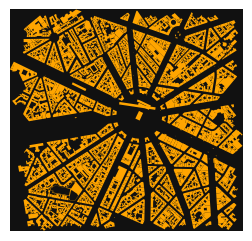

In [14]:
# <5>
import osmnx as ox

# get all parks and bus stops in some neighborhood
point = (48.873446, 2.294255)
dist = 612
tags = {"building": True}
gdf = ox.features.features_from_point(point, tags, dist=dist)
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))

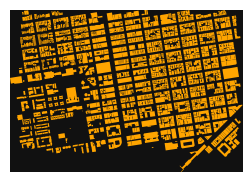

In [15]:
# <6> 
import osmnx as ox

# define a bounding box in San Francisco as (left, bottom, right, top)
bbox = -122.43, 37.78, -122.41, 37.79
tags = {"building": True}
gdf = ox.features.features_from_bbox(bbox,tags)
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))

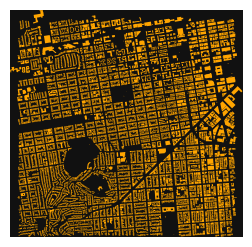

In [22]:
# <6> 
import osmnx as ox

point = (37.772, -122.434)
dist = 1500
bbox = ox.utils_geo.bbox_from_point(point, dist)
tags = {"building": True}

gdf = ox.features.features_from_bbox(bbox,tags)
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))